In [1]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy, Pandas and Matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Extract Processed Data**

In [3]:
# Include processed data
X_train = np.array(pd.read_csv('/content/drive/MyDrive/P_D/train_x.csv')) 
y_train = np.array(pd.read_csv('/content/drive/MyDrive/P_D/train_y.csv')) 
X_val = np.array(pd.read_csv('/content/drive/MyDrive/P_D/val_x.csv')) 
y_val = np.array(pd.read_csv('/content/drive/MyDrive/P_D/val_y.csv')) 
X_test = np.array(pd.read_csv('/content/drive/MyDrive/P_D/test_x.csv')) 
y_test = np.array(pd.read_csv('/content/drive/MyDrive/P_D/test_y.csv')) 

In [4]:
# Reshaping from 2D 
X_train = X_train.reshape(X_train.shape[0], 40,40,3)
X_test = X_test.reshape(X_test.shape[0], 40,40,3)
X_val = X_val.reshape(X_val.shape[0], 40,40,3)

In [5]:
# Create a model object
model = tf.keras.Sequential()   

In [6]:
# Add a convolution and max pooling layer
model.add(tf.keras.layers.Conv2D(80, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(40, 40, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

In [7]:
# Add more convolution and max pooling layers
model.add(tf.keras.layers.Conv2D(80, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(40, 40, 3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(80, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(40, 40, 3)))  
 


In [8]:
# Flatten the convolution layer
model.add(tf.keras.layers.Flatten()) 

In [9]:
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(80, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(80, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))
# Add the dense layer and dropout layer
model.add(tf.keras.layers.Dense(80, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Add the output layer
model.add(tf.keras.layers.Dense(10,activation="softmax"))
    
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
# Train the model for 16 epochs with batch size of 150
results = model.fit(X_train, y_train, batch_size = 120, epochs=16, validation_data=(X_val, y_val))      

Epoch 1/16
59/59 [==============================] - 28s 465ms/step - loss: 2.2110 - accuracy: 0.1508 - val_loss: 2.0817 - val_accuracy: 0.1766
Epoch 2/16
59/59 [==============================] - 27s 461ms/step - loss: 2.0441 - accuracy: 0.2148 - val_loss: 1.8018 - val_accuracy: 0.3716
Epoch 3/16
59/59 [==============================] - 27s 461ms/step - loss: 1.8379 - accuracy: 0.3004 - val_loss: 1.5699 - val_accuracy: 0.4450
Epoch 4/16
59/59 [==============================] - 27s 461ms/step - loss: 1.6847 - accuracy: 0.3796 - val_loss: 1.4303 - val_accuracy: 0.4817
Epoch 5/16
59/59 [==============================] - 27s 462ms/step - loss: 1.5474 - accuracy: 0.4297 - val_loss: 1.2904 - val_accuracy: 0.5149
Epoch 6/16
59/59 [==============================] - 27s 462ms/step - loss: 1.4113 - accuracy: 0.4938 - val_loss: 1.1133 - val_accuracy: 0.6560
Epoch 7/16
59/59 [==============================] - 27s 460ms/step - loss: 1.2984 - accuracy: 0.5405 - val_loss: 1.0291 - val_accuracy: 0.6927

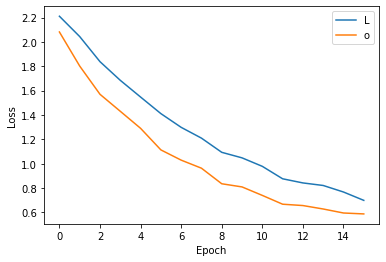

In [11]:
# Plot the the training loss
plt.plot(results.history["loss"], label = "loss")
# Plot the the validation loss
plt.plot(results.history["val_loss"], label = "val_loss")
# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")
# Put legend table
plt.legend("Loss")
# Show the plot
plt.show()


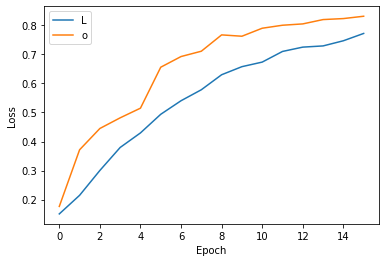

In [12]:
# Plot the the training accuracy
plt.plot(results.history["accuracy"], label = "accuracy")

# Plot the the validation accuracy
plt.plot(results.history["val_accuracy"], label = "val_accuracy")

# Name the x and y axises
plt.ylabel("Loss")
plt.xlabel("Epoch")

# Put legend table
plt.legend("Loss")

# Show the plot
plt.show()

In [13]:
# Evaluate the performance
model.evaluate(X_test, y_test)

28/28 [==============================] - 1s 32ms/step - loss: 0.5446 - accuracy: 0.8339


[0.5446127653121948, 0.8339060544967651]

In [14]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[777].reshape(1,40,40,3))

# Print the prediction result
prediction_result

array([[1.0665988e-03, 1.1370297e-02, 3.6868983e-04, 6.0843313e-03,
        9.0973520e-01, 1.4790185e-03, 3.1118903e-05, 6.8907879e-02,
        4.1009256e-04, 5.4677681e-04]], dtype=float32)

In [15]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [16]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 4 with 0.9097352027893066 probability %
